Logistic regression is a member of Generalized Linear Model, $g(E(y|x)) = x^{t}\beta
$ for some g(·). The main goal is to model tha binary response with a transformed linear part of the covariates(predictors). ie. $y|X=x \sim Bin(1,\pi=g^{-1}(x^{t}\beta))$ for each observed y. The logistic link function, $g(\pi)=ln(\frac{\pi}{1-\pi})$ matches the range of linear estimator $x^{t}\beta$ and the binary response:

$$
ln(\frac{\pi}{1-\pi})=x_{i}^{t}\beta=\eta_{i}, 1\leq i \leq n
$$

Then the loss function (or the averaged negative loglikelihood function)$L(\pi,y)$ for the logistic regression is:

$$
-\sum_{i=1}^{n}[y_{i}ln(\pi_{i})+(1-y_{i})ln(1-\pi_{i})]/n
$$

Suppose we have p-dimensional covariate, the corresponding gradient would be

$$
\nabla L=\frac{d}{d\mathcal{\beta}}L(\pi,y)=\left(\frac{\partial L}{\partial \beta_{0}},\frac{\partial L}{\partial \beta_{1}},...,\frac{\partial L}{\partial \beta_{p}}\right)^{T}
$$

where $$\frac{\partial L}{\partial \beta_{i}}=\sum_{i=1}^{n}\frac{\partial L}{\partial \pi_{i}}\times \frac{\partial \pi_{i}}{\partial \eta_{i}}\times \frac{\partial \eta_{i}}{\partial \beta_{j}} $$

 \begin{cases} 
      \eta_{i} = \sum_{j=1}^{p}x_{ij}\beta_{j} \\
      \pi_{i}=\frac{e^{\eta_{i}}}{1+e^{\eta_{i}}} ,1-\pi_{i}=\frac{1}{1+e^{\eta_{i}}}\\
      v_{i}=Var(y_{i})=y_{i}(1-y_{i}) 
   \end{cases}


It follows that 

 \begin{cases} 
      \frac{\partial L}{\partial \pi_{i}} =\frac{y_{i}}{\pi_{i}(1-\pi)}-\frac{1}{1-\pi_{i}} \\
     \frac{\partial \pi_{i}}{\partial \eta_{i}}=\frac{e^{\eta_{i}}}{(1+e^{\eta_{i}})^{2}}=\pi_{i}(1-\pi_{i})\\
     \frac{\partial \eta_{i}}{\partial \beta_{j}}=x_{ij}
   \end{cases}


Now let's write the gradient in a more compact way

$$
\frac{\partial L}{\partial \beta_{i}}=\sum_{i=1}^{n}\left(\frac{y_{i}}{\pi_{i}(1-\pi)}-\frac{1}{1-\pi_{i}}\right)\times \left(\pi_{i}(1-\pi_{i})\right)\times x_{ij}=\sum_{i=1}^{n}x_{ij}(y_{i}-\pi_{i}),j=0,1,...,p
$$

and 

$$
\nabla L=X^{T}(\mathbf{y}-\mathbf{\pi})
$$

where X is the design matrix and $y,\pi$ are vectorized observation and probablity.

So by the gradient descent, we can find the optimal parameter by the following iteration equation:

$$
\mathbf{\beta}_{j+1}=\mathbf{\beta}_{j}+\alpha \nabla L(\mathbf{\beta}_{j})/n
$$

where $\alpha$ is the learning rate.
To verify the results of gradient descent, I will choose the same dataset in the logistic regression notebook.

In [193]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [198]:

import random
class Logistic_regression_GD():
    def __init__(self,X,y,learning_rate=0.01,iterations=200,random_state=42):
        np.random.seed(random_state)
        self.X=np.array(X)
        self.y=np.array(y)
        self.n=len(self.y)
        self.p=np.shape(X)[1] # assume the data include the intercept column
        self.param= np.random.normal(0, 1,  self.p,)
        self.lr=learning_rate
        self.ite=iterations
       # self.pi=0
        
    def gradient(self,pi):
        grad=np.dot(self.X.transpose(),self.y-pi)/self.n
        return grad
    def sigmoid(self,z):
        
        return 1.0/(1 + np.exp(-z))
    def loss_LR(self,est):
        pi=self.sigmoid(np.dot(self.X,est))#np.exp(np.dot(self.X,np.array(est)))/(1+np.exp(np.dot(self.X,np.array(est))))
        loss= -np.mean(self.y*(np.log(pi)) + (1-self.y)*np.log(1-pi))
        return loss
        
    def Worker(self):
        #init_pi=self.initparam
        #loss[0]=self.loss_LR(init_pi)
        est=self.param
        loss=[]
        loss.append(self.loss_LR(est))
        for i in range(self.ite):
            print(i+1,'th iteration')
            
            pi=np.exp(np.dot(self.X,est))/(1+np.exp(np.dot(self.X,est)))
            est=est+self.lr*self.gradient(pi)
            loss.append(self.loss_LR(est))
        print('loss function with iteration times')
        plt.plot(loss)
        self.param=est
        print('iterated loss with gradient descent')
        return  
            
    def predict(self,test, threshold=0.5):
        pred=1.0/(1 + np.exp(-np.dot(test,self.param)))  #np.exp(np.dot(self.X,self.param))/(1+np.exp(np.dot(self.X,self.param)))
        
        round_pred= [1 if p > threshold else 0 for p in pred]
        return round_pred
    
        

In [199]:
# do the same data preprocessing in logistic regression

df = pd.read_csv('cancer.csv', header = 0)
df.head()
dummy=pd.get_dummies(df.diagnosis, prefix='diagnosis').iloc[:, 1:] 
#dummy.head(10)
data_new=pd.concat([df, dummy], axis=1)

data2=data_new.drop(['diagnosis','Unnamed: 32','id'],axis=1) #drop id,diagnosis and unnamed variable
data2.head(10)
#response
y= data2['diagnosis_M']
data2=data2.drop(['diagnosis_M'],axis=1)
column=data2.columns
#features
X=data2[column]
X['intercept']=1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdscalar =StandardScaler()
X_train =  stdscalar.fit_transform(X_train)
X_test =  stdscalar.transform(X_test)

## Model fitting

1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration
10 th iteration
11 th iteration
12 th iteration
13 th iteration
14 th iteration
15 th iteration
16 th iteration
17 th iteration
18 th iteration
19 th iteration
20 th iteration
21 th iteration
22 th iteration
23 th iteration
24 th iteration
25 th iteration
26 th iteration
27 th iteration
28 th iteration
29 th iteration
30 th iteration
31 th iteration
32 th iteration
33 th iteration
34 th iteration
35 th iteration
36 th iteration
37 th iteration
38 th iteration
39 th iteration
40 th iteration
41 th iteration
42 th iteration
43 th iteration
44 th iteration
45 th iteration
46 th iteration
47 th iteration
48 th iteration
49 th iteration
50 th iteration
51 th iteration
52 th iteration
53 th iteration
54 th iteration
55 th iteration
56 th iteration
57 th iteration
58 th iteration
59 th iteration
60 th iteration
61 th iteration
62 th iteration
63 th iteration
6

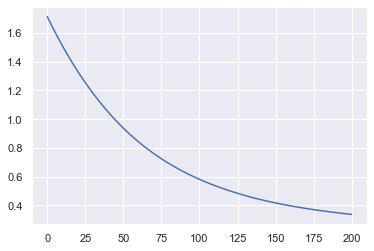

In [200]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
logreg = Logistic_regression_GD(X=X_train, y=y_train)
logreg.Worker()


In [201]:

y_pred = logreg.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        67
           1       0.76      0.89      0.82        47

    accuracy                           0.84       114
   macro avg       0.84      0.85      0.84       114
weighted avg       0.85      0.84      0.84       114

roc score: 0.8497935852651635


### If we increase the number of iteration:

1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration
10 th iteration
11 th iteration
12 th iteration
13 th iteration
14 th iteration
15 th iteration
16 th iteration
17 th iteration
18 th iteration
19 th iteration
20 th iteration
21 th iteration
22 th iteration
23 th iteration
24 th iteration
25 th iteration
26 th iteration
27 th iteration
28 th iteration
29 th iteration
30 th iteration
31 th iteration
32 th iteration
33 th iteration
34 th iteration
35 th iteration
36 th iteration
37 th iteration
38 th iteration
39 th iteration
40 th iteration
41 th iteration
42 th iteration
43 th iteration
44 th iteration
45 th iteration
46 th iteration
47 th iteration
48 th iteration
49 th iteration
50 th iteration
51 th iteration
52 th iteration
53 th iteration
54 th iteration
55 th iteration
56 th iteration
57 th iteration
58 th iteration
59 th iteration
60 th iteration
61 th iteration
62 th iteration
63 th iteration
6

783 th iteration
784 th iteration
785 th iteration
786 th iteration
787 th iteration
788 th iteration
789 th iteration
790 th iteration
791 th iteration
792 th iteration
793 th iteration
794 th iteration
795 th iteration
796 th iteration
797 th iteration
798 th iteration
799 th iteration
800 th iteration
801 th iteration
802 th iteration
803 th iteration
804 th iteration
805 th iteration
806 th iteration
807 th iteration
808 th iteration
809 th iteration
810 th iteration
811 th iteration
812 th iteration
813 th iteration
814 th iteration
815 th iteration
816 th iteration
817 th iteration
818 th iteration
819 th iteration
820 th iteration
821 th iteration
822 th iteration
823 th iteration
824 th iteration
825 th iteration
826 th iteration
827 th iteration
828 th iteration
829 th iteration
830 th iteration
831 th iteration
832 th iteration
833 th iteration
834 th iteration
835 th iteration
836 th iteration
837 th iteration
838 th iteration
839 th iteration
840 th iteration
841 th iterati

1539 th iteration
1540 th iteration
1541 th iteration
1542 th iteration
1543 th iteration
1544 th iteration
1545 th iteration
1546 th iteration
1547 th iteration
1548 th iteration
1549 th iteration
1550 th iteration
1551 th iteration
1552 th iteration
1553 th iteration
1554 th iteration
1555 th iteration
1556 th iteration
1557 th iteration
1558 th iteration
1559 th iteration
1560 th iteration
1561 th iteration
1562 th iteration
1563 th iteration
1564 th iteration
1565 th iteration
1566 th iteration
1567 th iteration
1568 th iteration
1569 th iteration
1570 th iteration
1571 th iteration
1572 th iteration
1573 th iteration
1574 th iteration
1575 th iteration
1576 th iteration
1577 th iteration
1578 th iteration
1579 th iteration
1580 th iteration
1581 th iteration
1582 th iteration
1583 th iteration
1584 th iteration
1585 th iteration
1586 th iteration
1587 th iteration
1588 th iteration
1589 th iteration
1590 th iteration
1591 th iteration
1592 th iteration
1593 th iteration
1594 th it

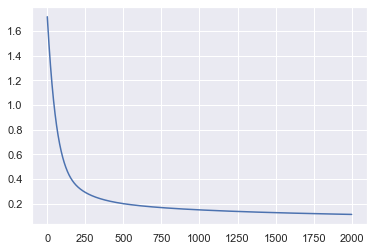

In [202]:
logreg2 = Logistic_regression_GD(X=X_train, y=y_train,iterations=2000)
logreg2.Worker()


In [203]:
y_pred2 = logreg2.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred2))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

roc score: 0.8497935852651635


Even though the results are still not as good as before, we can see the gradient desenct dose do the job of decreasing the value of loss function. The reason why the GD has worse performance thant the skicit package might be from the algorithm the package use. Or the hyperparameter such as the learning rate also plays an important role.

To improve the performance of GD, we can increase the number of iteration, the scale of learning rate. Furthermore, we can apply other algorithms to find the optimal estimate in logistic regression. Newton-Raphson is another famous algorithm used in logistic regression whic needs the infromation of Hessian matrix or the Fisher information matrix (in the statistic sense).